### Summary:


In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation, metrics   #model optimization and valuation tools
from sklearn.model_selection import GridSearchCV
from utils import *

/home/alba/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/alba/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
if os.path.exists('data_nyctaxi_2017_cleaned_2_model.csv'): # Check if the dataset is present on local disk and load it
    data = pd.read_csv('data_nyctaxi_2017_cleaned_2_model.csv')
else:
    print('Run Part-2 first')

In [3]:
data.describe()

,Unnamed: 0,DOLocationID,PULocationID,RatecodeID,VendorID,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,...,trip_distance,Week,Week_day,Month_day,Hour,Trip_duration,Shift_type,Speed_mph,Tip_percentage,With_tip
count,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,...,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1.109528e+06,1109528.0
mean,5.547635e+05,1.618769e+02,1.640701e+02,1.040177e+00,1.541500e+00,3.212213e-01,1.346980e+01,2.999776e-01,4.979819e-01,1.600292e+00,...,3.048356e+00,2.940629e+00,3.990044e+00,1.529404e+01,1.382849e+01,1.682102e+01,1.793457e+00,1.117852e+01,1.611211e+01,1.0
std,3.202933e+05,7.010205e+01,6.599519e+01,2.814929e-01,4.982750e-01,3.719215e-01,1.142373e+01,2.594628e-03,3.180861e-02,1.250949e+00,...,3.811428e+00,1.318138e+00,1.877335e+00,8.865403e+00,6.276174e+00,4.950240e+01,7.100369e-01,6.229666e+00,4.383357e+00,0.0
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-4.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.457719e-03,1.0
25%,2.773818e+05,1.130000e+02,1.140000e+02,1.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,3.000000e-01,5.000000e-01,1.000000e+00,...,1.010000e+00,2.000000e+00,2.000000e+00,8.000000e+00,9.000000e+00,7.133333e+00,1.000000e+00,7.234450e+00,1.522881e+01,1.0
50%,5.547635e+05,1.620000e+02,1.620000e+02,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+01,3.000000e-01,5.000000e-01,1.000000e+00,...,1.700000e+00,3.000000e+00,4.000000e+00,1.500000e+01,1.500000e+01,1.181667e+01,2.000000e+00,9.859873e+00,1.666431e+01,1.0
75%,8.321452e+05,2.340000e+02,2.330000e+02,1.000000e+00,2.000000e+00,5.000000e-01,1.500000e+01,3.000000e-01,5.000000e-01,2.000000e+00,...,3.200000e+00,4.000000e+00,6.000000e+00,2.300000e+01,1.900000e+01,1.926667e+01,2.000000e+00,1.344059e+01,1.666667e+01,1.0
max,1.109527e+06,2.650000e+02,2.650000e+02,6.000000e+00,2.000000e+00,1.000000e+00,4.105000e+02,3.000000e-01,9.300000e-01,9.000000e+00,...,5.985000e+02,5.000000e+00,7.000000e+00,3.100000e+01,2.300000e+01,1.439633e+03,3.000000e+00,2.400000e+02,9.983880e+01,1.0


In [4]:
target = 'Tip_percentage'


var = ['DOLocationID_RATIO', 'PULocationID_RATIO', 'RatecodeID_RATIO', 'VendorID_RATIO', 'extra', 'fare_amount'
       , 'improvement_surcharge', 'month_RATIO', 'mta_tax', 'passenger_count', 'store_and_fwd_flag_RATIO'
       , 'tolls_amount', 'total_amount', 'Dropoff_dt_RATIO',  'Pickup_dt_RATIO', 'trip_distance', 'Week_RATIO'
       , 'Week_day_RATIO', 'Month_day_RATIO', 'Hour_RATIO', 'Trip_duration', 'Shift_type_RATIO', 'Speed_mph']

var_cat= ['RatecodeID', 'VendorID', 'month', 'Month_day','store_and_fwd_flag', 'Dropoff_dt',  'Pickup_dt', 'Week',
 'Week_day', 'Month_day', 'Hour', 'Shift_type','DOLocationID', 'PULocationID']

In [5]:
data["DOLocationID"] = data["DOLocationID"].astype('category')
data["PULocationID"] = data["PULocationID"].astype('category')
data["RatecodeID"] = data["RatecodeID"].astype('category')
data["VendorID"] = data["VendorID"].astype('category')
data["payment_type"] = data["payment_type"].astype('category')
data["Week"] = data["Week"].astype('category')
data["Week_day"] = data["Week_day"].astype('category')
data["Month_day"] = data["Month_day"].astype('category')
data["month"] = data["month"].astype('category')
data["Hour"] = data["Hour"].astype('category')
data["Dropoff_dt"]=data["Dropoff_dt"].astype('category')
data["Pickup_dt"]=data["Pickup_dt"].astype('category')
data["Shift_type"]=data["Shift_type"].astype('category')

### TRAIN TEST

In [6]:
mydata={}
mydata['train'], mydata['test']= mysplit(data, 0.6, 12345)

In [7]:
pd.set_option('display.max_columns', 500)
mydata['train'].head(2)

,Unnamed: 0,DOLocationID,PULocationID,RatecodeID,VendorID,extra,fare_amount,improvement_surcharge,month,mta_tax,passenger_count,payment_type,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,Dropoff_dt,Pickup_dt,trip_distance,Week,Week_day,Month_day,Hour,Trip_duration,Shift_type,Speed_mph,Tip_percentage,With_tip,rand
1,1,238,249,1,2,0.5,19.5,0.3,Nov,0.5,1,1,N,3.55,0.0,24.35,2017-11-26 20:50:41,2017-11-26 20:28:02,5.30,4.0,7,26,20,22.65,2.0,14.039735,14.579055,1,0.316376
2,2,238,142,1,2,0.5,5.5,0.3,Nov,0.5,1,1,N,1.70,0.0,8.50,2017-11-29 20:05:08,2017-11-29 19:59:50,0.93,5.0,3,29,19,5.30,2.0,10.528302,20.000000,1,0.183919


In [8]:
# Encoding categorical variables to numeric 
mydata['train'] = encode_vars_ratio(mydata, mydata['train'], mydata['train'], var_cat, target, True, 100)

In [9]:
mydata['test'] = encode_vars_ratio(mydata, mydata['test'], mydata['test'], var_cat, target, True, 100)

In [ ]:
#tic = dt.datetime.now()
#from sklearn.ensemble import RandomForestRegressor
# parameter estimator
#param_test = {'n_estimators':range(50,200,25)} # define range over which number of trees is to be optimized
#regressor = RandomForestRegressor()
# get results of the search grid
#gs_rfr = optimize_predictor(regressor,param_test,'mean_squared_error',mydata['train'],var,target)

In [ ]:
#with open('my_classifier.pkl','wb') as fid:
#    pickle.dump(gs_rfr.best_estimator_,fid)
#    fid.close()

In [28]:
from sklearn.metrics import mean_absolute_error

# Calculate individual errors 
def reg_error(mydata, real, pred, bins=20):
    myerrordata = mydata[pred] - mydata[real]
    # Error distribution
    plt.hist(myerrordata, bins=bins)
    # Error
    print("AVG_SC: {}".format(mydata[real].mean()))
    print("MAE   : {}".format(mean_absolute_error(mydata[real], mydata[pred])))
    print("MAEN  : {}".format(mean_absolute_error(mydata[real], mydata[pred]) / (0.0 + mydata[real].mean())))    

In [23]:
mydata['train']=mydata['train'].sample(frac=0.5,replace=False,random_state=1)
len(mydata['train'])

83176

In [24]:
parameters = {'n_estimators': [100,150], 'max_depth':[4,6,8], 'min_samples_split': [20,30,40],
          'learning_rate': [0.06], 'loss': ['ls']}
#clf = ensemble.GradientBoostingRegressor(**params)
clf = GridSearchCV(ensemble.GradientBoostingRegressor(), parameters)
clf.fit(mydata['train'][var], mydata['train'][target])

print("Best parameters combination")
print(clf.best_params_)
print("F1 scores on each combination:")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))

Best parameters combination
{'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 150}
F1 scores on each combination:
0.544 (+/-0.026) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 100}
0.658 (+/-0.017) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 150}
0.545 (+/-0.027) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 30, 'n_estimators': 100}
0.657 (+/-0.021) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 30, 'n_estimators': 150}
0.551 (+/-0.025) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 40, 'n_estimators': 100}
0.661 (+/-0.011) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 40, 'n_estimators': 150}
0.750 (+/-0.014) for {'learning_rate': 0.06, 'loss': 'ls', 'max_depth': 6, 'min_samples_split': 20, 'n_estimators':

In [26]:
with open('rf_classif.pkl','wb') as fid:
    pickle.dump(clf.best_estimator_,fid)
    fid.close()

Detailed accuracy metrics:
AVG_SC: 16.115402906458087
MAE   : 0.6109429529169059
MAEN  : 0.03791049820244188


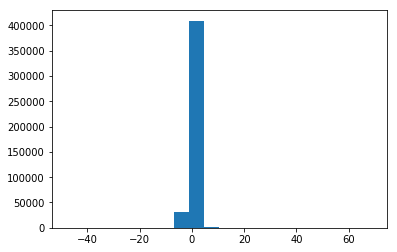

In [29]:
print("Detailed accuracy metrics:")
mydata['test'][target+'_inf'] = clf.predict(mydata['test'][var])
reg_error(mydata['test'],target, target+'_inf')

In [ ]:
The

In [ ]:
# load the model from disk
#clf = pickle.load(open('rfr_regressor.pkl', 'rb'))
#gs_rfr

### Variable's importance in the model

In [30]:
d = clf.best_estimator_.feature_importances_
aux = sum(d)
dd = []
for index, k in enumerate(d):
    d[index] = d[index] / (aux + 0.0)
    dd.append((var[index],d[index]))

dd = sorted(dd, key=lambda x:-x[1])
dd

[('total_amount', 0.5128327728992546),
 ('fare_amount', 0.3522244665824546),
 ('extra', 0.06991939543527063),
 ('tolls_amount', 0.036480844341213514),
 ('Trip_duration', 0.006748360611156047),
 ('trip_distance', 0.005920314842003525),
 ('PULocationID_RATIO', 0.0030020138277131294),
 ('DOLocationID_RATIO', 0.0029756427111114724),
 ('Speed_mph', 0.0023737730338965804),
 ('Hour_RATIO', 0.0017353375762488104),
 ('Month_day_RATIO', 0.0013069054328716937),
 ('Shift_type_RATIO', 0.0011179750096855),
 ('RatecodeID_RATIO', 0.0007839053320972845),
 ('mta_tax', 0.00066402815917176),
 ('VendorID_RATIO', 0.0006591613925443771),
 ('Week_day_RATIO', 0.0005136342730434033),
 ('passenger_count', 0.00047490242333743344),
 ('month_RATIO', 0.00013284983625271396),
 ('Week_RATIO', 9.196230669034263e-05),
 ('store_and_fwd_flag_RATIO', 3.296316896033867e-05),
 ('improvement_surcharge', 8.79080502244123e-06),
 ('Dropoff_dt_RATIO', 0.0),
 ('Pickup_dt_RATIO', 0.0)]